#Insurance Claims Charges Prediction

Download dataset

In [103]:
!wget https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv

--2024-01-05 04:37:47--  https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55628 (54K) [text/plain]
Saving to: ‘insurance.csv.4’

insurance.csv.4     100%[===================>]  54.32K  --.-KB/s    in 0.004s  

2024-01-05 04:37:47 (13.7 MB/s) - ‘insurance.csv.4’ saved [55628/55628]



##STEP-1: Importing Libraries & Data Set

In [104]:
#import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [105]:
#Read the Data
insuranace_df = pd.read_csv("insurance.csv")
insuranace_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##STEP-2:Exploratory Data Analysis (EDA)

In [106]:
# Descriptive stats
insuranace_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [107]:
# Null check
insuranace_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Visulizations

<Axes: xlabel='age', ylabel='charges'>

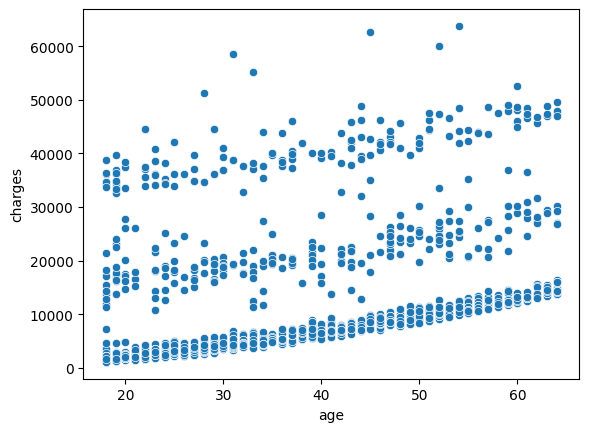

In [108]:
# Age vs Charges
# the more the age the more will be insurance charge
sns.scatterplot(x="age",
                    y="charges",
                    data=insuranace_df)

<Axes: xlabel='sex', ylabel='charges'>

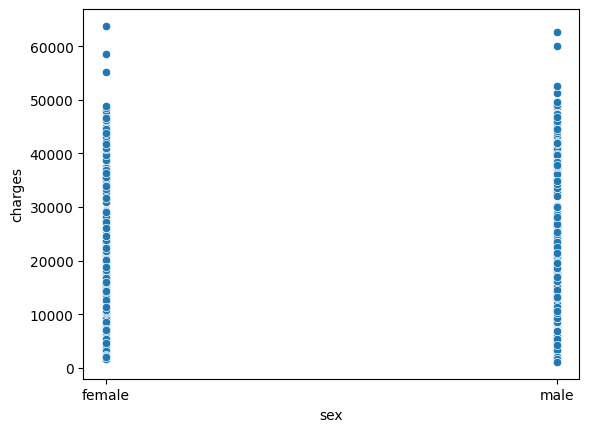

In [109]:
# sex vs charges
# males insurance charges more than females.
sns.scatterplot(x="sex",
                    y="charges",
                    data=insuranace_df)

<Axes: xlabel='smoker', ylabel='charges'>

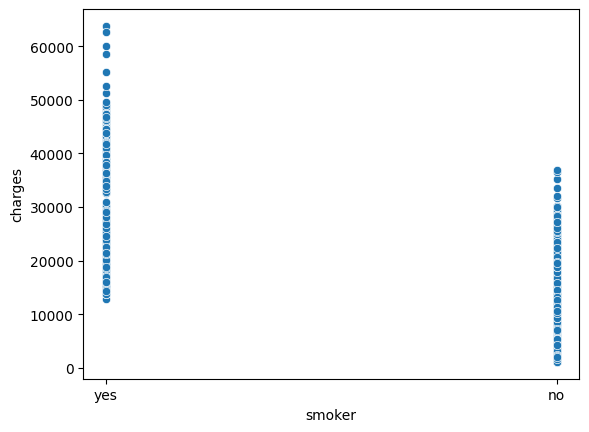

In [110]:
# smoker vs charges
# smokers have more insurance charges than the non smokers
sns.scatterplot(x="smoker",
                    y="charges",
                    data=insuranace_df)

<Axes: xlabel='region', ylabel='charges'>

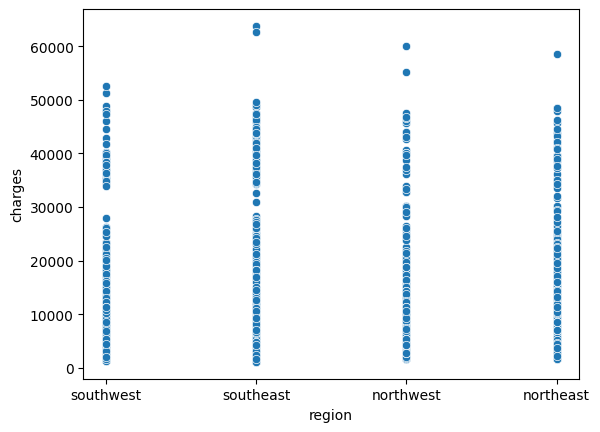

In [111]:
# region vs charges
# region actually does not play any role in determining the insurance charges
sns.scatterplot(x="region",
                    y="charges",
                    data=insuranace_df)

In [112]:
# plotting the correlation plot for the dataset
insuranace_df.corr()


<ipython-input-112-6c4f6e4dd621>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  insuranace_df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


##STEP-3:Data Preprocessing / Clean the Data


In [113]:
# removing unnecassary columns from the dataset
insuranace_df.drop(['region'],axis = 1 , inplace = True)

In [114]:
insuranace_df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [115]:
# Label Encoding for sex and smoker
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
insuranace_df['sex'] = le.fit_transform(insuranace_df['sex'])
insuranace_df['smoker'] = le.fit_transform(insuranace_df['smoker'])


In [116]:
insuranace_df

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [117]:
insuranace_df.corr()

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


In [118]:
#nons_df = insuranace_df[insuranace_df.smoker == 0]

In [119]:
nons_df

,age,sex,bmi,children,smoker,charges
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
5,31,0,25.740,0,0,3756.62160
...,...,...,...,...,...,...
1332,52,0,44.700,3,0,11411.68500
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350


In [120]:
#Selecting Independent (Features) & Dependent(Target) variables
X=insuranace_df[['age','sex','bmi','children','smoker']]
y= insuranace_df[['charges']]


Splitting the dataset into the Training set and Test set

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state=42)


##STEP-4 : Fit the Model & Predict , check the Accuracy

##Linear Regression

In [123]:
# creating the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
lr = LinearRegression()

# feeding the training data to the model
lr.fit(X_train,y_train)
# predicting the test set results
predictions = lr.predict(X_train)

# calculating the mean squared error
MSE= mean_squared_error(y_train,predictions)
print(f"Mean Squared Error (MSE): {MSE}")
# Calculating the root mean squared error
rmse = np.sqrt(MSE)
print(f"Root Mean Squared Error (RMSE): {rmse}")
# Calculating the r2 score
r2_value = r2_score(y_train,predictions)
print(f"R-squared score: {r2_value}")

Mean Squared Error (MSE): 37369582.73531941
Root Mean Squared Error (RMSE): 6113.06655740958
R-squared score: 0.7410888590280913


##Support Vector Machine

In [125]:
# creating the model
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
# feeding the training data to the model
svmregrssion =SVR(kernel='linear')
svmregrssion.fit(X_train,y_train)

# predicting the test set results
predicts= svmregrssion.predict(X_train)
# calculating the mean squared error

MSE= mean_squared_error(y_train,predicts)
print(f"Mean Squared Error (MSE): {MSE}")
# Calculating the root mean squared error
rmse = np.sqrt(MSE)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculating the r2 score

r2_value=r2_score(y_train,predicts)
print(f"R-squared score: {r2_value}")


Mean Squared Error (MSE): 165953240.9051666
Root Mean Squared Error (RMSE): 12882.283994120242
R-squared score: -0.14978920838023835


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##Decision Tree

In [127]:
# creating the model
from sklearn import tree
from sklearn.metrics import mean_squared_error,r2_score
dt=tree.DecisionTreeRegressor()

# feeding the training data to the model
dt.fit(X_train,y_train)
# predicting the test set results
p=dt.predict(X_train)
# calculating the mean squared error
print(f"Mean Squared Error (MSE): {MSE}")
MSE=mean_squared_error(y_train,predicts)

# Calculating the root mean squared error

rmse = np.sqrt(MSE)
print(f"Root Mean Squared Error (RMSE): {rmse}")
# Calculating the r2 score

r2_value = r2_score(y_train,p)
print(f"R-squared score: {r2_value}")

Mean Squared Error (MSE): 165953240.9051666
Root Mean Squared Error (RMSE): 12882.283994120242
R-squared score: 0.9983078124756305


##Random Forest

In [126]:
# creating the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
# feeding the training data to the model
rf= RandomForestRegressor()
# predicting the test set results
rf.fit(X_train,y_train)
pr= rf.predict(X_train)
# calculating the mean squared error

MSE= mean_squared_error(y_train,predicts)
print(f"Mean Squared Error (MSE): {MSE}")
# Calculating the root mean squared error
rmse = np.sqrt(MSE)
print(f"Root Mean Squared Error (RMSE): {rmse}")
# Calculating the r2 score

r2_value= r2_score(y_train,p)
print(f"R-squared score: {r2_value}")

<ipython-input-126-5ff83ebeb238>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


Mean Squared Error (MSE): 165953240.9051666
Root Mean Squared Error (RMSE): 12882.283994120242
R-squared score: 0.9983078124756305


Compare and evaluate the Model results and find the best model